<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys, pprint, gc
import pickle
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
curr_dir = os.getcwd()
print(curr_dir)

/Users/ariahosseini/Desktop/Notebooks


In [ ]:
pprint.pprint(sorted(os.listdir(curr_dir)))

['.DS_Store',
 '.ipynb_checkpoints',
 'Algorithm-Dynamic.ipynb',
 'Algorithm-Recursive.ipynb',
 'Algorithm-Sorting.ipynb',
 'DataStructure-BinarySearchTree.ipynb',
 'DataStructure-DoublyLinkedList.ipynb',
 'DataStructure-Graph.ipynb',
 'DataStructure-SinglyLinkedList.ipynb',
 'LeetCode-Easy.ipynb',
 'LeetCode-Math.ipynb',
 'LeetCode-SeventyFive.ipynb',
 'MC_RayTracing_HCACF.ipynb',
 'ML-CatBoost-ProjOne.ipynb',
 'ML-CatBoost-ProjTwe.ipynb',
 'ML-CatBoost-StartingPoint.ipynb',
 'ML-LightGBM.ipynb',
 'ML-PyCaret-Classification.ipynb',
 'ML-PyCaret-Regression.ipynb',
 'ML-XGBoost.ipynb',
 'NeetCode-Easy.ipynb',
 'SciKitLearn-GeneralizedLinearModels.ipynb',
 'SciKitLearn-LinearModels.ipynb',
 'SciKitLearn-NonLinearModels.ipynb',
 'SciKitLearn-Preprocessing.ipynb',
 'SciKitLearn-Supvised-ProjFive-Reg.ipynb',
 'SciKitLearn-Supvised-ProjFour-Clf-and-Reg.ipynb',
 'SciKitLearn-Supvised-ProjOne-Clf.ipynb',
 'SciKitLearn-Supvised-ProjSix-Reg.ipynb',
 'SciKitLearn-Supvised-ProjThree-Clf.ipynb',
 '

In [ ]:
path = "walmart/"
data_dir = os.path.join(curr_dir,path)
print(data_dir)

/Users/ariahosseini/Desktop/Notebooks/walmart/


In [ ]:
walmart_data = os.listdir(data_dir)
pprint.pprint(walmart_data)

['sales_train_evaluation.csv',
 'calendar.csv',
 'sell_prices.csv',
 'sales_train_validation.csv',
 'sample_submission.csv']


In [ ]:
def display_df(df, message = " "):
    print("Dataframe: {}".format(message))
    num_rows = len(df)
    num_cols = len(df.columns)
    print("num_rows = {:,} \nnum_cols = {:,}".format(num_rows, num_cols))
    display(df.head())
    print("Info:")
    print(df.info())
    df_null = df.isnull().sum()
    if len(df_null)==0:
        print("Number of null data points:",df_null[df_null!=0])
    else:
        print("Number of null data points:")
        print(df_null[df_null!=0])

In [ ]:
# read data files
sales_train_eval = pd.read_csv(data_dir+walmart_data[0])
calendar = pd.read_csv(data_dir+walmart_data[1])
sell_prices = pd.read_csv(data_dir+walmart_data[2])
sales_train_valid = pd.read_csv(data_dir+walmart_data[3])

In [ ]:
display_df(df = sell_prices, message = "sell_prices")

Dataframe: sell_prices
num_rows = 6,841,121 
num_cols = 4


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None
Number of null data points:
Series([], dtype: int64)


In [ ]:
display_df(df = sales_train_valid, message = "sales_train_valid")

Dataframe: sales_train_valid
num_rows = 30,490 
num_cols = 1,919


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None
Number of null data points:
Series([], dtype: int64)


In [ ]:
display_df(df = sales_train_eval, message = "sales_train_eval")

Dataframe: sales_train_eval
num_rows = 30,490 
num_cols = 1,947


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None
Number of null data points:
Series([], dtype: int64)


In [ ]:
display_df(df = calendar, message = "calendar")

Dataframe: calendar
num_rows = 1,969 
num_cols = 14


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None
Number of null data points:
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
dtype: int64


In [ ]:
def reduce_memory_usage(df, category = False):
    start_mem = df.memory_usage().sum() / (1024**2)
    print("Memory usage of dataframe is {:2f} MB!".format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            if category:
                df[col] = df[col].astype("category")
    end_mem = df.memory_usage().sum() / (1024**2)
    print("Memory usage after optimization is {:2f} MB!".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem-end_mem) / start_mem))

In [ ]:
reduce_memory_usage(df = sales_train_eval, category = False)

Memory usage of dataframe is 242.332260 MB!
Memory usage after optimization is 96.130440 MB!
Decreased by 60.3%


In [ ]:
reduce_memory_usage(df = calendar, category = False)

Memory usage of dataframe is 0.122182 MB!
Memory usage after optimization is 0.122182 MB!
Decreased by 0.0%


In [ ]:
reduce_memory_usage(df = sell_prices, category = False)

Memory usage of dataframe is 130.484154 MB!
Memory usage after optimization is 130.484154 MB!
Decreased by 0.0%


In [ ]:
reduce_memory_usage(df = sales_train_valid, category = False)

Memory usage of dataframe is 428.137676 MB!
Memory usage after optimization is 94.996416 MB!
Decreased by 77.8%


In [ ]:
gc.collect()

74854

In [ ]:
def create_series_data(df, calendar, sell_prices, include_events = False):
    df_one = pd.melt(df,
                      id_vars = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
                      var_name = "day",
                      value_name = "sales").dropna()
    df_two = df_one.merge(calendar, left_on = "day", right_on = "d", how = "left")
    if include_events:
        df_three = df_two[["id", "item_id", "dept_id", "cat_id", "store_id",
                           "state_id", "day", "sales", "date", "wm_yr_wk",
                           "event_name_1", "event_type_1", "event_name_2",
                           "event_type_2"]]
    else:
        df_three = df_two[["id", "item_id", "dept_id", "cat_id", "store_id",
                           "state_id", "day", "sales", "date", "wm_yr_wk"]]
    df_four = df_three.merge(sell_prices, on=["store_id", "item_id", "wm_yr_wk"],
                             how="left")
    return df_four

In [ ]:
def get_val_data(sales_train_valid, calendar, sell_prices, include_events, data="val"):
    pickle_file = data_dir + "val_data_{}{}.pkl".format(data, include_events)
    print(pickle_file)
    if os.path.exists(pickle_file):
        print("loading {}".format(pickle_file))
        val_data = pickle.load(open(pickle_file, "rb"))
    else:
        val_data = create_series_data(sales_train_valid,
                                      calendar, sell_prices, include_events)
        pickle.dump(val_data, open(pickle_file, "wb"))
    return val_data

all_include_events = [True, False]
all_data_types = ["val", "eval"]
stv = sales_train_valid
for i in [0,1]:
    for j in [0,1]:
        stv = sales_train_valid
        if j== 1:
            stv = sales_train_eval
        print("iter = {} {}".format(i,j))
        val_data = get_val_data(stv, calendar, sell_prices,
                                all_include_events[i], all_data_types[j])
gc.collect()

iter = 0 0
/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valTrue.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valTrue.pkl
iter = 0 1
/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_evalTrue.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_evalTrue.pkl
iter = 1 0
/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valFalse.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valFalse.pkl
iter = 1 1
/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_evalFalse.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_evalFalse.pkl


1317

In [ ]:
val_data = get_val_data(sales_train_valid, calendar, sell_prices, False, "val")

/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valFalse.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valFalse.pkl


In [ ]:
def summarize_columns(df):
    num_rows = len(df)
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"])
    summary = summary.reset_index()
    summary["col_name"] = summary["index"]
    summary = summary[["col_name", "dtypes"]]
    summary["missing"] = df.isnull().sum().values
    summary["missing_percent"] = summary["missing"].apply(lambda x: round(x*1000/num_rows, 1))
    summary["uniques"] = df.nunique().values
    summary["first_value"] = df.iloc[0].values
    summary["second_value"] = df.iloc[1].values
    summary["third_value"] = df.iloc[2].values
    return summary

In [ ]:
summary_df = summarize_columns(val_data)
summary_df.head()

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,id,object,0,0.0,30490,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation
1,item_id,object,0,0.0,3049,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003
2,dept_id,object,0,0.0,7,HOBBIES_1,HOBBIES_1,HOBBIES_1
3,cat_id,object,0,0.0,3,HOBBIES,HOBBIES,HOBBIES
4,store_id,object,0,0.0,10,CA_1,CA_1,CA_1


In [ ]:
state_dist = val_data.groupby(["state_id"])["sales"].sum().reset_index()
store_dist = val_data.groupby(["store_id"])["sales"].sum().reset_index()
dept_dist = val_data.groupby(["dept_id"])["sales"].sum().reset_index()
cat_dist = val_data.groupby(["cat_id"])["sales"].sum().reset_index()

display(state_dist)
display(store_dist)
display(dept_dist)
display(cat_dist)

,state_id,sales
0,CA,28675547
1,TX,18899006
2,WI,18120856


,store_id,sales
0,CA_1,7698216
1,CA_2,5685475
2,CA_3,11188180
3,CA_4,4103676
4,TX_1,5595292
5,TX_2,7214384
6,TX_3,6089330
7,WI_1,5149062
8,WI_2,6544012
9,WI_3,6427782


,dept_id,sales
0,FOODS_1,5088041
1,FOODS_2,7629822
2,FOODS_3,32372076
3,HOBBIES_1,5596460
4,HOBBIES_2,528340
5,HOUSEHOLD_1,11500526
6,HOUSEHOLD_2,2980144


,cat_id,sales
0,FOODS,45089939
1,HOBBIES,6124800
2,HOUSEHOLD,14480670


<Axes: xlabel='state_id'>

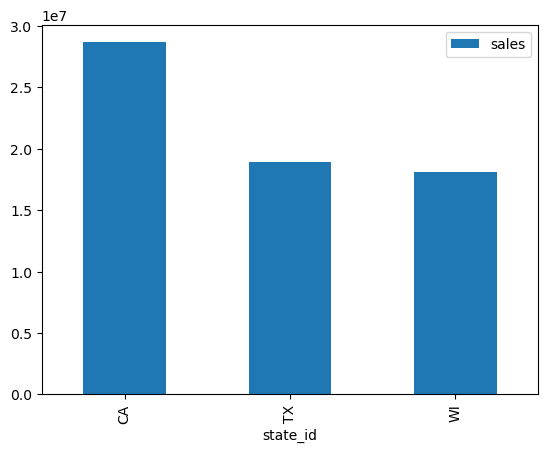

In [ ]:
state_dist.set_index("state_id").plot(kind="bar")

<Axes: xlabel='state_id,cat_id'>

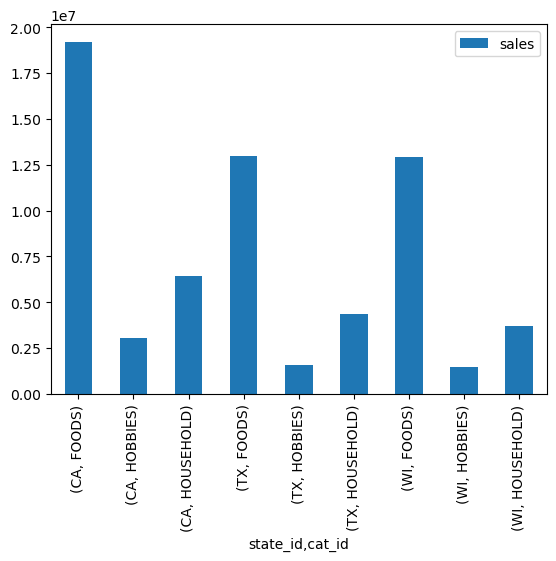

In [ ]:
cat_state_dist = val_data.groupby(["state_id", "cat_id"])["sales"].sum().reset_index()
cat_state_dist.set_index(["state_id", "cat_id"]).plot(kind="bar")

In [ ]:
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


In [ ]:
def plot_single_id(df, _id, start="", end=""):
    row_mask = df["id"] == _id
    tr_df = df[row_mask][["date", "sales"]].copy()
    tr_df.set_index("date", inplace=True)
    tr_df.loc[start:].sales.plot(figsize=(14,6), title=_id, ylabel="sales")

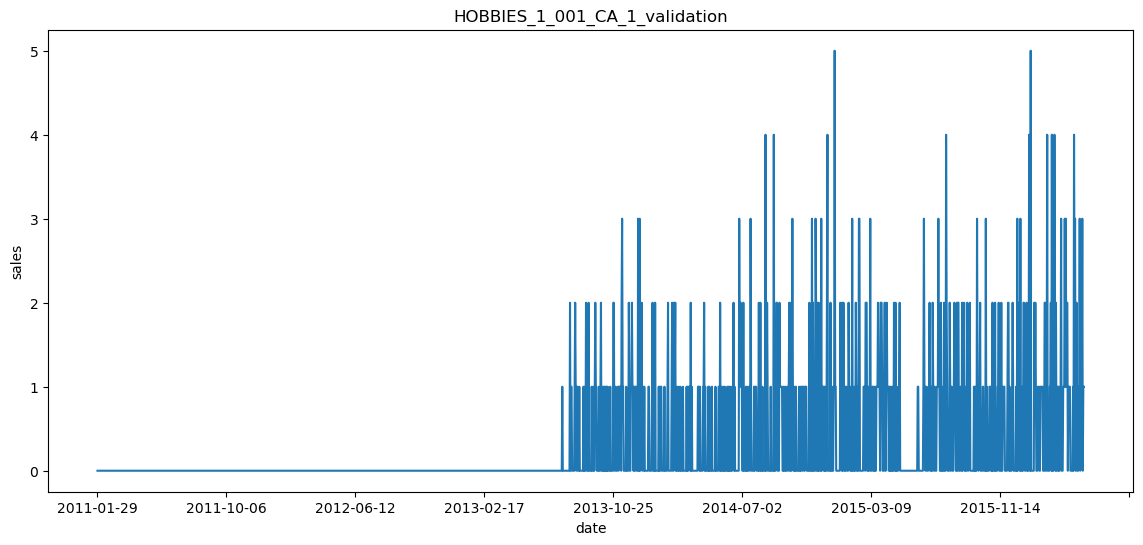

In [ ]:
plot_single_id(df=val_data, _id="HOBBIES_1_001_CA_1_validation", start="", end="")

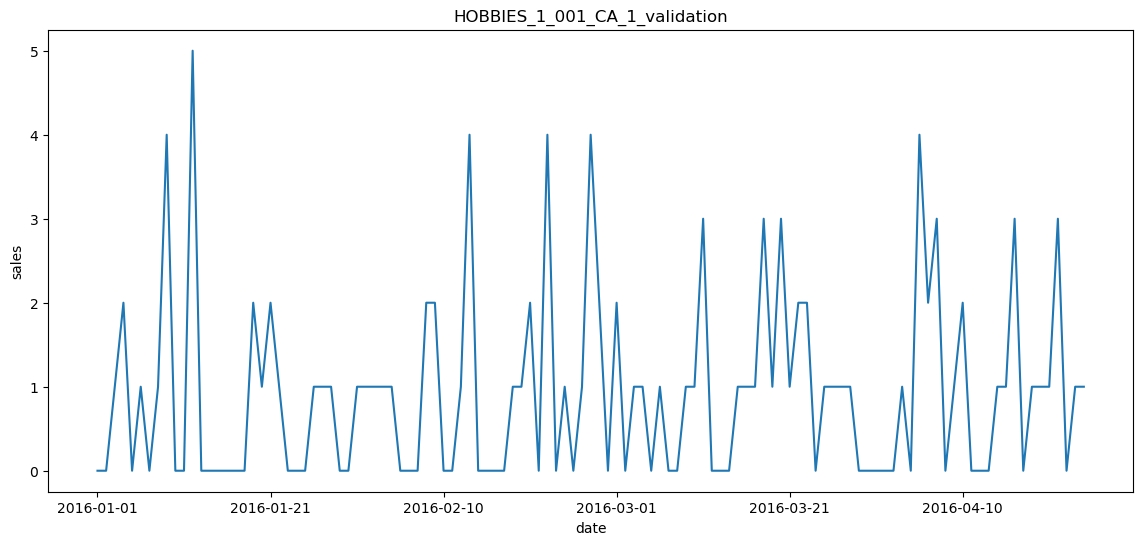

In [ ]:
plot_single_id(df=val_data, _id="HOBBIES_1_001_CA_1_validation", start="2016-01", end="2016-04")

In [ ]:
day_lags = [28, 29, 30, 31, 32, 33, 34]
def add_lags(val_data, day_lags=day_lags):
    print("adding lag features ...")
    lag_sales_cols = [f"lag_{day_lag}" for day_lag in day_lags]
    for day_lag in day_lags:
        col_name = "lag_{}".format(day_lag)
        val_data[col_name] = val_data[["id", "sales"]].groupby("id")["sales"].shift(day_lag).fillna(-1)
    return val_data

In [ ]:
windows = [7, 14, 28]
day_lag = [28]
def add_window_features(val_data, windows=windows, day_lag=day_lag):
    print("adding window features ...")
    lag_col = "lag_{}".format(day_lag[0])
    for window in windows:
        val_data[f"rmean_28_{window}"] = val_data[["id", lag_col]].groupby("id")[lag_col].transform(lambda x: x.rolling(window))
    return val_data

In [ ]:
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


In [ ]:
def add_daytime_cols_all(df, data_field):
    print("adding date and time features ...")
    df[data_field] = pd.to_datetime(df[data_filed])
    df[data_field + "_day_of_week"] = df[data_filed].dt.dayofweek.astypee("unit8")
    df[data_field + "_day_of_year"] = df[data_filed].dt.dayofyear.astypee("unit8")
    df[data_field + "_week_of_year"] = df[data_filed].dt.weekofyear.astypee("unit8")
    df[data_field + "_month"] = df[data_filed].dt.month.astypee("unit8")
    df[data_field + "_year"] = df[data_filed].dt.year.astypee("unit8")
    df[data_field + "_quarter"] = df[data_filed].dt.quarter.astypee("unit8")
    return df

In [ ]:
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


In [ ]:
def add_categorial_date(val_data, cat_feats):
    print("label encoding cat variables ...")
    print(cat_feats)
    for feat in cat_feats:
        label = LabelEncoder()
        val_data[feat] = label.fit_transform(val_data[feat])
    return val_data

In [ ]:
gc.collect()
include_events = True
val_data = get_val_data(sales_train_valid, calendar, sell_prices, include_events, "val")
val_data.head()

/Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valTrue.pkl
loading /Users/ariahosseini/Desktop/Notebooks/walmart/val_data_valTrue.pkl


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN,NaN,NaN


In [ ]:
def prepare_val_data(val_data, include_events):
    prep_data_pkl = data_dir + "prepare_data_{}.pkl".format(include_events)
    if os.path.exists(prep_data_pkl):
        val_data = pickle.load(open(prep_data_pkl, "rb"))
    else:
        val_data = add_lags(val_data)
        val_data = add_window_features(val_data)
        val_data = add_daytime_cols_all(val_data, "date")
    return val_data
val_data = prepare_val_data(val_data, include_events)
gc.collect()
val_data.head()

adding lag features ...
adding window features ...


In [ ]:
prep_data_pkl = data_dir + "prepare_data_{}.pkl".format(include_events)
if not os.path.exists(prep_data_pkl):
    pickle.dump(open(prep_data_pkl, "wb"))

In [ ]:
val_data.columns

In [ ]:
cat_feats = ["item_id", "dept_id", "store_id", "cat_id", "state_id"]
event_cats = ["event_name_1", "event_name_2", "event_type_1", "event_type_2"]
if include_events:
    cat_feats = cat_feats + event_cats
    for event in event_cats:
        val_data[event] = val_data[event].fillna("not_available")
print(cat_feats)
for feat in cat_feats:
    print(feat)
    label = LabelEncoder()
    val_data[feat] = label.fit_transform(val_data[feat])

In [ ]:
list(val_data["event_type_2"].unique())

In [ ]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit = "D")
x_train = val_data.loc[val_data.date <= cutoff].copy()
x_valid = val_data.loc[val_data.date > cutoff].copy()
y_train = x_train["sales"].copy()
y_valid = x_valid["sales"].copy()
drop_cols = ["id", "sales", "day", "date", "wm_yr_wk"]
x_train.drop(drop_cols, axis=1, inplacee=True)
x_valid.drop(drop_cols, axis=1, inplacee=True)
x_train.head()
gc.collect()

In [ ]:
d_train = lgb.Dataset(x_train, label = y_train, categorial_feature = cat_feats, free_raw_data = False)
d_valid = lgb.Dataset(x_valid, label = y_valid, categorial_feature = cat_feats, free_raw_data = False)
del x_train, x_valid
gc.collect()
params {
    "objective": "tweedie",
    "metric": "rmse",
    "learning_rate": 0.075,
    "sub_feature": 0.8,
    "sub_row": 0.8,
    "bagging_freq": 1,
    "lambda_12": 0.1,
    "num_iterations": 500,
    "num_leaves": 128
}
if not os.path.exists(data_dir + "lgb_model.pkl"):
    m_lgb = lgb.train(params, d_train, valid_sets = [d_train, d_valid],
                      early_stopping_rounds = 150, verbose_eval 100)
    pickle.dump(m_lgb, open(data_dir + "lgb_model.pkl", "wb"))
else:
    pickle.load(open(data_dir + "lgb_model.pkl", "rb"))

In [ ]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit = "D")
x_valid = val_data.loc[val_data.date > cutoff].copy()
x_valid.drop(drop_cols, axis=1, inplace=True)
preds = m_lgb.predict(x_valid)
rmse = mean_squared_error(val_data.loc[val_data.date > cutoff]["sales"], preds, squared=False)
print(rmse)

In [ ]:
valid_mask = val_data.date > cutoff
val_ddata = prepare_val_data(val_data, True)
output_df = val_data[valid_mask]
output_df["preds"] = preds
output_df.head()

In [ ]:
out_pivot_df = output_df.pivot(index="id", columns="date", values="preds").reset_index()
out_pivot_df.columns = ["id"] + ["F" + str(x) for x in range(1,29)]
out_pivot_df.head()